## Project Scoping, cleaning and EDA


---

### Problem Statement

A friend of mine is a new property agent hoping to brush up on her understanding of historical market transactions to improve her knowledge and credibility when conversing with potential clients. She is seeking my help to educate her on the transaction prices of property sold in Singapore based on past data. She's interested to know which factors are the strongest predictors of property resale prices. As she's not trained in data analytics or data science, she is less interested in the specific model used and wants to hear about the nuances of having more F&B nearby, type of schools, etc. 


In [1]:
### External Research


In [2]:
### Datasets


---

### EDA

- Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [104]:
housing = pd.read_csv('./datasets/train.csv', low_memory=False)
housing.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [106]:
# Summary stats

housing.describe(include = 'all')

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634,150634,150634,150634,150634,150634,150634.00000,150634,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000
unique,NaN,110,26,7,2514,553,25,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,9157,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9125,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,1657,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN
top,NaN,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 ROOM Model A,"91, TANGLIN HALT RD",NaN,NaN,NaN,NaN,NaN,Y,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142091,NaN,NaN,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punggol,NaN,NaN,NaN,NaN,NaN,Blk 121,NaN,NaN,NaN,Marsiling Primary School,NaN,NaN,NaN,NaN,NaN,Bendemeer Secondary School,NaN,NaN,NaN,NaN
freq,NaN,2088,11451,61136,579,2451,34699,NaN,46261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35127,106,NaN,NaN,NaN,NaN,NaN,150634,121815,150619,150592,150499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,11451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7671,NaN,NaN,NaN,NaN,NaN,774,NaN,NaN,NaN,2075,NaN,NaN,NaN,NaN,NaN,3384,NaN,NaN,NaN,NaN
mean,93047.887496,NaN,NaN,NaN,NaN,NaN,NaN,97.19763,NaN,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,NaN,NaN,1046.235290,434.130280,28.551536,15.139816,1990.922906,NaN,NaN,NaN,NaN,NaN,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,NaN,1.366224,103.839391,NaN,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,NaN,0.546364,0.264024,1.365667,103.839400,115.258966,NaN,1.366231,103.839369,395.172974,NaN,55.368190,0.113195,1.366268,103.839106,508.533220,NaN,210.146428,0.031879,1.365986,103.839340
std,53679.906247,NaN,NaN,NaN,NaN,NaN,NaN,24.40304,NaN,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,NaN,NaN,262.674321,104.797180,12.138829,6.232492,12.202185

In [107]:
# Residential units have no variation

housing['residential'].value_counts()

Y    150634
Name: residential, dtype: int64

In [108]:
# Dropping 'residential' as a predictor

housing.drop(columns = 'residential', inplace = True)

In [109]:
# Checking for columns with null data.

housing.isna().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

<AxesSubplot: >

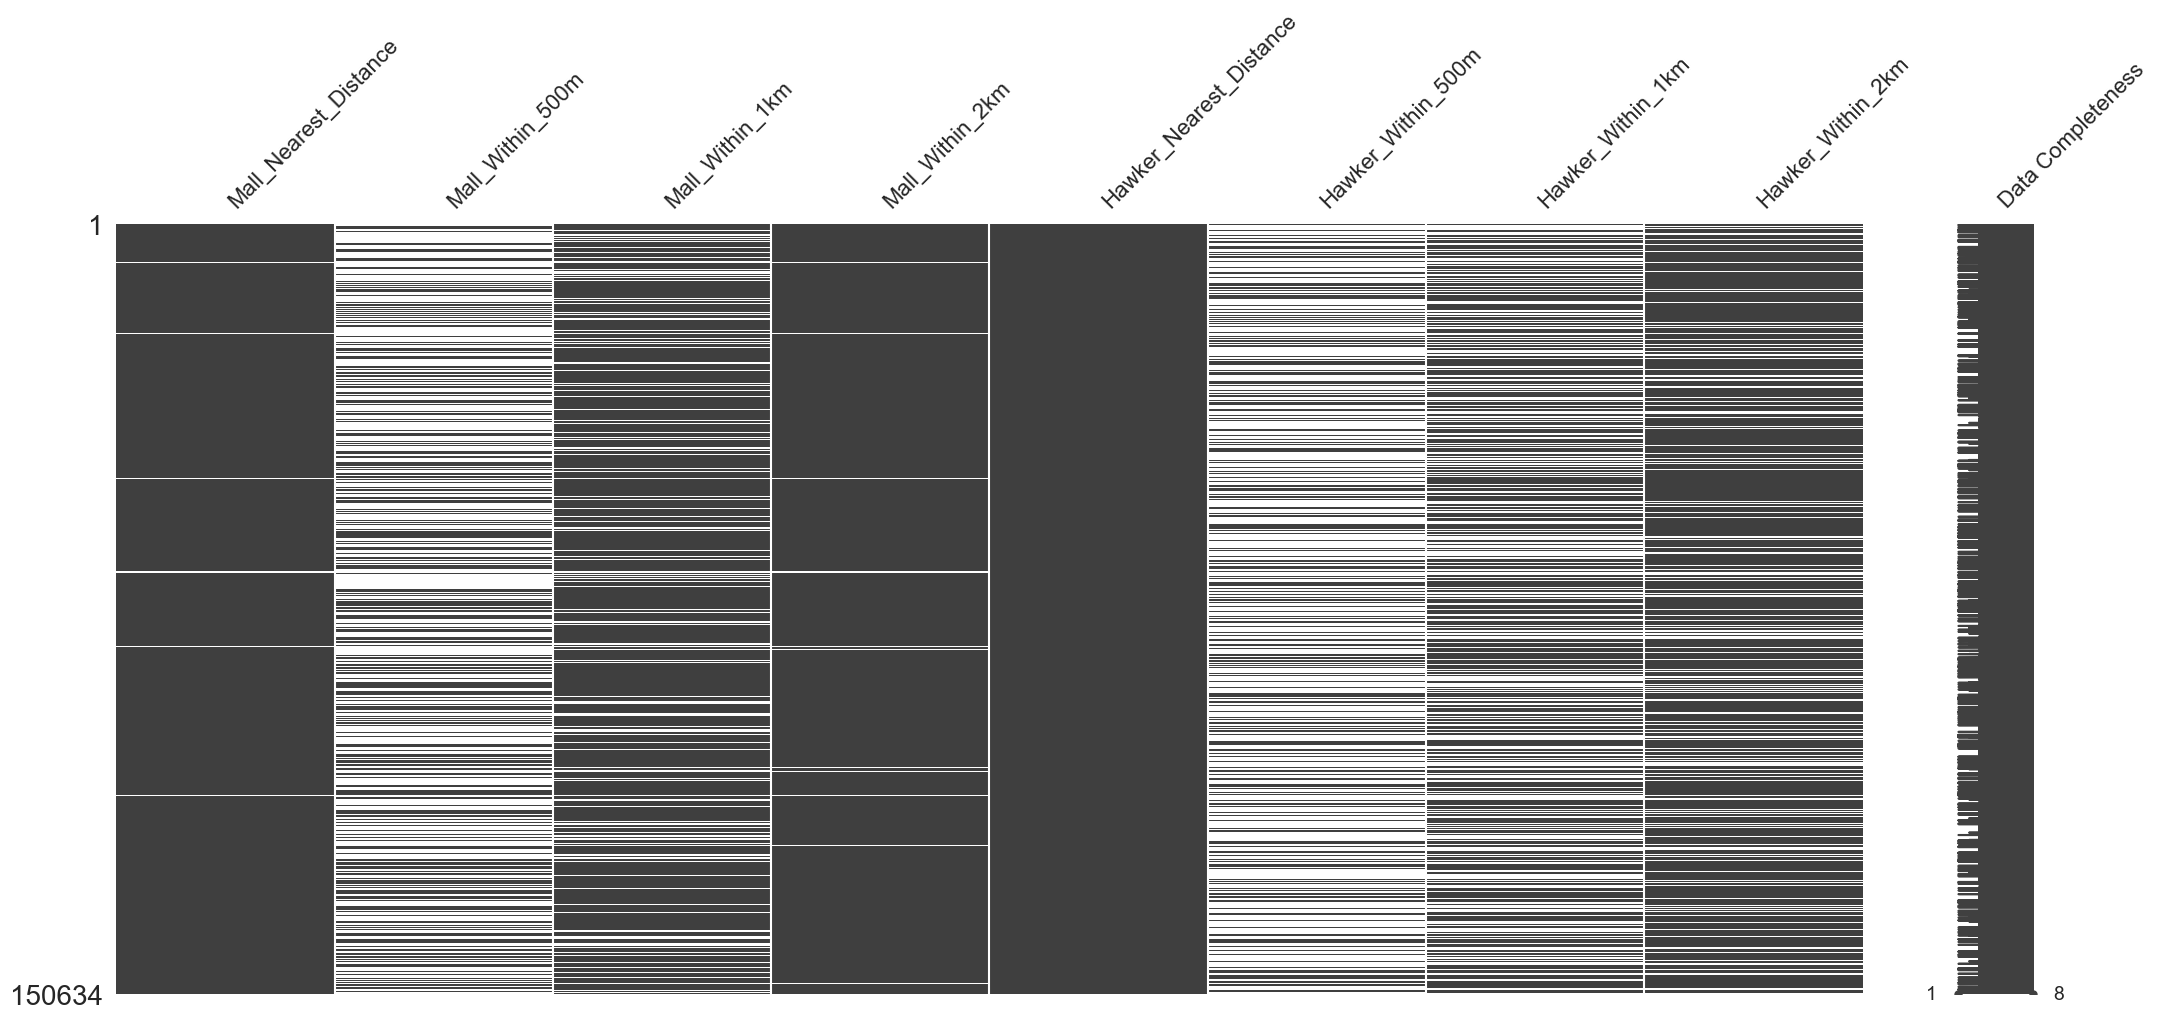

In [110]:
to_check = housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km']]

msno.matrix(to_check, labels = True)

In [111]:
# There are rows with supposedly 0 mall nearest distance but there are counts for malls within 500m,1km etc
# We will drop these rows as the missing values are likely to be due to errors during data collection, since there should 
# be data in the nearest distance column

no_mall_distance = housing[(housing['Mall_Nearest_Distance'].isnull()) & (housing['Mall_Within_500m'].isnull())]

In [112]:
to_drop = no_mall_distance.index
housing.drop(to_drop, inplace = True)

In [113]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_500m'].isnull() & (housing['Mall_Nearest_Distance'] <= 500)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [114]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_1km'].isnull() & (housing['Mall_Nearest_Distance'] <= 1000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [115]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] <= 2000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [116]:
# Remaining NaN values can be replaced by 0 as the figures correspond with the nearest distance

housing['Mall_Within_500m'].fillna(0, inplace = True)
housing['Mall_Within_1km'].fillna(0, inplace = True)
housing['Mall_Within_2km'].fillna(0, inplace = True)

In [117]:
# Looking at the missing values for hawker distances, seems to be similar to mall distances:

housing[housing['Hawker_Within_500m'].isnull()]

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
6,173300,2018-05,HOUGANG,5 ROOM,641,HOUGANG AVE 8,07 TO 09,120.0,Improved,1987,433000.0,2018,5,8,7,9,8,5 ROOM Improved,"641, HOUGANG AVE 8",1291.680,335.222346,34,17,1986,N,N,N,N,64,0,0,0,0,64,0,0,0,0,0,0,0,530641,1.371276,103.880059,Hougang,490.262931,1.0,1.0,8.0,516.981824,NaN,1.0,4.0,40,0,1370.648274,Kovan,0,0,1.359703,103.884303,46.567429,Blk 639,1.370877,103.880187,331.669318,Xinmin Primary School,48,0,1.371415,103.883039,294.826501,Bowen Secondary School,224,0,1.370751,103.877459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150628,162877,2020-07,SENGKANG,5 ROOM

In [118]:
# Should the missing values under the columns on hawker within a certain radius have values?
housing[housing['Hawker_Within_500m'].isnull() & (housing['Hawker_Nearest_Distance'] <= 500)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [119]:
housing[housing['Hawker_Within_1km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 1000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [120]:
housing[housing['Hawker_Within_2km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 2000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [121]:
# Same as the mall variables, so we will replace NaN with 0

housing['Hawker_Within_500m'].fillna(0, inplace = True)
housing['Hawker_Within_1km'].fillna(0, inplace = True)
housing['Hawker_Within_2km'].fillna(0, inplace = True)

In [122]:
housing

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2

### Combining or creating proxy variables

In [123]:
# variable that's relevant to a few stories within 1 particular block in New Market Road...

housing[housing['market_hawker'] == 'Y'].head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
34706,3655,2020-10,CENTRAL AREA,2 ROOM,32,NEW MKT RD,07 TO 09,52.0,Standard,1983,318000.0,2020,10,8,7,9,8,2 ROOM Standard,"32, NEW MKT RD",559.728,568.133093,38,9,1968,Y,Y,N,N,127,0,85,38,3,0,0,0,0,0,1,0,0,50032,1.284859,103.842579,Outram,80.720511,2.0,5.0,29.0,1.873295,4.0,8.0,13.0,87,0,116.890273,Chinatown,0,1,1.285406,103.843476,99.361489,Chinatown Stn Exit C,1.28407,103.842999,1081.127506,Cantonment Primary School,58,0,1.275505,103.839923,635.25536,Outram Secondary School,188,0,1.286387,103.837073
50339,3666,2021-01,CENTRAL AREA,3 ROOM,32,NEW MKT RD,04 TO 06,66.0,Standard,1983,390000.0,2021,1,5,4,6,5,3 ROOM Standard,"32, NEW MKT RD",710.424,548.967940,38,9,1968,Y,Y,N,N,127,0,85,38,3,0,0,0,0,0,1,0,0,50032,1.284859,103.842579,Outram,80.720511,2.0,5.0,29.0,1.873295,4.0,8.0,13.0,87,0,116.890273,Chinatown,0,1,1.285406,103.843476,99.361489,Chinatown Stn Exit C,1.28407,103.842999,1081.127506,Cantonment Primary School,58,0,1.275505,103.839923,635.25536,Outram Secondary School,188,0,1.286387,103.837073
51561,3658,2013-09,CENTRAL AREA,2 ROOM,32,NEW MKT RD,07 TO 09,52.0,Standard,1983,363000.0,2013,9,8,7,9,8,2 ROOM Standard,"32, NEW MKT RD",559.728,648.529286,38,9,1968,Y,Y,N,N,127,0,85,38,3,0,0,0,0,0,1,0,0,50032,1.284859,103.842579,Outram,80.720511,2.0,5.0,29.0,1.873295,4.0,8.0,13.0,87,0,116.890273,Chinatown,0,1,1.285406,103.843476,99.361489,Chinatown Stn Exit C,1.28407,103.842999,1081.127506,Cantonment Primary School,58,0,1.275505,103.839923,635.25536,Outram Secondary School,188,0,1.286387,103.837073
53052,3663,2017-01,CENTRAL AREA,3 ROOM,32,NEW MKT RD,07 TO 09,66.0,Standard,1983,428000.0,2017,1,8,7,9,8,3 ROOM Standard,"32, NEW MKT RD",710.424,602.457124,38,9,1968,Y,Y,N,N,127,0,85,38,3,0,0,0,0,0,1,0,0,50032,1.284859,103.842579,Outram,80.720511,2.0,5.0,29.0,1.873295,4.0,8.0,13.0,87,0,116.890273,Chinatown,0,1,1.285406,103.843476,99.361489,Chinatown Stn Exit C,1.28407,103.842999,1081.127506,Cantonment Primary School,58,0,1.275505,103.839923,635.25536,Outram Secondary School,188,0,1.286387,103.837073
69260,3667,2012-11,CENTRAL AREA,3 ROOM,32,NEW MKT RD,07 TO 09,66.0,Standard,1983,470000.0,2012,11,8,7,9,8,3 ROOM Standard,"32, NEW MKT RD",710.424,661.576749,38,9,1968,Y,Y,N,N,127,0,85,38,3,0,0,0,0,0,1,0,0,50032,1.284859,103.842579,Outram,80.720511,2.0,5.0,29.0,1.873295,4.0,8.0,13.0,87,0,116.890273,Chinatown,0,1,1.285406,103.843476,99.361489,Chinatown Stn Exit C,1.28407,103.842999,1081.127506,Cantonment Primary School,58,0,1.275505,103.839923,635.25536,Outram Secondary School,188,0,1.286387,103.837073


In [124]:
# Housing and Planning Area seem extremely similar...
housing[['town', 'planning_area']]

,town,planning_area
0,KALLANG/WHAMPOA,Kallang
1,BISHAN,Bishan
2,BUKIT BATOK,Bukit Batok
3,BISHAN,Bishan
4,YISHUN,Yishun
...,...,...
150629,WOODLANDS,Woodlands
150630,JURONG WEST,Jurong West
150631,BEDOK,Bedok
150632,QUEENSTOWN,Queenstown


In [125]:
housing.describe(include = 'all')

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,149805.000000,149805,149805,149805,149805,149805,149805,149805.000000,149805,149805.000000,1.498050e+05,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805,149805,149805,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805,149805.000000,149805.000000,149805.000000,149805.000000
unique,NaN,110,26,7,2440,547,25,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,9015,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8983,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,1637,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN
top,NaN,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 ROOM Model A,"91, TANGLIN HALT RD",NaN,NaN,NaN,NaN,NaN,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142091,NaN,NaN,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punggol,NaN,NaN,NaN,NaN,NaN,Blk 121,NaN,NaN,NaN,Marsiling Primary School,NaN,NaN,NaN,NaN,NaN,Bendemeer Secondary School,NaN,NaN,NaN,NaN
freq,NaN,2088,11445,60657,579,2451,34566,NaN,45786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34780,106,NaN,NaN,NaN,NaN,NaN,121053,149790,149763,149692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,11445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7496,NaN,NaN,NaN,NaN,NaN,774,NaN,NaN,NaN,2071,NaN,NaN,NaN,NaN,NaN,3383,NaN,NaN,NaN,NaN
mean,92877.061073,NaN,NaN,NaN,NaN,NaN,NaN,97.228022,NaN,1992.316638,4.486621e+05,2016.466513,6.586756,8.263609,7.226955,9.300264,8.263609,NaN,NaN,1046.562426,433.463440,28.683362,15.107914,1990.789994,NaN,NaN,NaN,NaN,124.592070,0.139581,1.765615,39.277033,49.927406,26.304082,5.973486,0.024105,0.431054,0.063963,0.625827,0.059577,0.000340,NaN,1.366193,103.839322,NaN,664.239826,0.490097,1.796669,5.197650,1167.736858,0.490357,1.409532,3.801242,48.701746,58.293308,764.021115,NaN,0.545095,0.261453,1.365628,103.839335,115.194170,NaN,1.366201,103.839301,394.903494,NaN,55.308948,0.113187,1.366230,103.839040,507.628791,NaN,210.131070,0.031935,1.365954,103.839268
std,53640.649122,NaN,NaN,NaN,NaN,NaN,NaN,24.438881,NaN,12.040577,1.432125e+05,2.742246,3.339708,5.482182,5.489195,5.481607,5.482182,NaN,NaN,263.060119,104.166362,12.040577,6.194526,12.102331,NaN,NaN,NaN,NaN,58.309788

In [126]:
# Checking variables for potential sparsity

print('cols')
print(housing[housing == 0].count(axis=0)/len(housing.index))

cols
id                           0.000000
Tranc_YearMonth              0.000000
town                         0.000000
flat_type                    0.000000
block                        0.000000
street_name                  0.000000
storey_range                 0.000000
floor_area_sqm               0.000000
flat_model                   0.000000
lease_commence_date          0.000000
resale_price                 0.000000
Tranc_Year                   0.000000
Tranc_Month                  0.000000
mid_storey                   0.000000
lower                        0.000000
upper                        0.000000
mid                          0.000000
full_flat_type               0.000000
address                      0.000000
floor_area_sqft              0.000000
price_per_sqft               0.000000
hdb_age                      0.000000
max_floor_lvl                0.000000
year_completed               0.000000
commercial                   0.000000
market_hawker                0.000000
multist

In [127]:
# dropping affiliation and pri_sch_affiliation due to sparsity of data (more than 20% missing)

housing.drop(columns = ['affiliation', 'pri_sch_affiliation'], inplace = True)

In [128]:
# the types of rooms sold are very skewed, seem to overlap with the variables full flat type and think the
# total number of units of a particular type being sold is less important to the resale price than the type of the unit 
# itself. Will drop the columns on number of unit type sold

housing.drop(columns = ['1room_sold', '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold'], inplace = True)

In [129]:
# Dropping rental columns due to sparsity of data

housing.drop(columns = ['1room_rental','2room_rental', '3room_rental', 'other_room_rental'], inplace = True)

In [130]:
housing.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', 'postal', 'Latitude',
       'Longitude', 'planning_area', 'Mall_Nearest_Distance',
       'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km',
       'Hawker_Nearest_Distance', 'Hawker_Within_500m', 'Hawker_Within_1km',
       'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_name', 'bus_stop_latitude',
       'bus_stop_lon

In [131]:
housing.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,N,N,N,N,142,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1.317659,103.882504,1138.633422,Geylang Methodist School,224,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,N,N,N,N,112,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,N,N,N,N,90,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,N,N,N,75,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1.354789,103.844934,389.515528,Catholic High School,253,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,N,N,N,N,48,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,1.414888,103.838335


In [132]:
# Looking at flat type columns, which seem similar...

housing[['flat_model', 'full_flat_type', 'flat_type']]


,flat_model,full_flat_type,flat_type
0,Model A,4 ROOM Model A,4 ROOM
1,Improved,5 ROOM Improved,5 ROOM
2,Apartment,EXECUTIVE Apartment,EXECUTIVE
3,Model A,4 ROOM Model A,4 ROOM
4,Simplified,4 ROOM Simplified,4 ROOM
...,...,...,...
150629,Apartment,EXECUTIVE Apartment,EXECUTIVE
150630,Improved,5 ROOM Improved,5 ROOM
150631,Apartment,EXECUTIVE Apartment,EXECUTIVE
150632,Improved,3 ROOM Improved,3 ROOM


In [133]:
# Drop flat_model and flat_type and use full_flat_type instead

housing.drop(columns = ['flat_model', 'flat_type'], inplace = True)

In [134]:
# Looking at all the categorical location-type columns... 

housing[['town', 'street_name', 'address', 'planning_area', 'mrt_name', 'bus_stop_name']].head(30)

,town,street_name,address,planning_area,mrt_name,bus_stop_name
0,KALLANG/WHAMPOA,UPP BOON KENG RD,"3B, UPP BOON KENG RD",Kallang,Kallang,Blk 3B
1,BISHAN,BISHAN ST 13,"153, BISHAN ST 13",Bishan,Bishan,BLK 151A MKT
2,BUKIT BATOK,BT BATOK ST 25,"289B, BT BATOK ST 25",Bukit Batok,Bukit Batok,Blk 289E
3,BISHAN,BISHAN ST 22,"232, BISHAN ST 22",Bishan,Bishan,Opp Bishan Nth Shop Mall
4,YISHUN,YISHUN ST 81,"876, YISHUN ST 81",Yishun,Khatib,Blk 873
5,GEYLANG,ALJUNIED CRES,"95, ALJUNIED CRES",Geylang,MacPherson,Blk 90
6,HOUGANG,HOUGANG AVE 8,"641, HOUGANG AVE 8",Hougang,Kovan,Blk 639
7,BEDOK,BEDOK RESERVOIR RD,"701, BEDOK RESERVOIR RD",Bedok,Bedok North,Opp Blk 701
8,BISHAN,SIN MING AVE,"450, SIN MING AVE",Bishan,Marymount,Blk 454
9,SENGKANG,ANCHORVALE RD,"307D, ANCHORVALE RD",Sengkang,Sengkang,Blk 309D


In [135]:
housing['mrt_name'].value_counts().tail(10)

Labrador Park      47
Nicoll Highway     42
Changi Airport     38
Woodleigh          31
Botanic Gardens    23
Bras Basah         22
Tan Kah Kee        12
Bendemeer          11
Novena             10
Bugis               9
Name: mrt_name, dtype: int64

In [136]:
housing['bus_stop_name'].value_counts().tail(10)

Opp Marymount Stn           3
Opp Queensway Shop Ctr      3
Blk 704                     3
IBIS S'PORE ON BENCOOLEN    2
Opp Track 18                2
Sembawang Stn               2
Opp Blk 317                 2
Blk 682A                    2
Aft King George's Ave       1
Alexandra Hosp              1
Name: bus_stop_name, dtype: int64

In [137]:
# Drop town, street name, address, to use 'planning_area' as a categorical variable to represent location
# to also drop bus_stop_name due to granularity issues - too many small counts

housing.drop(columns = ['town', 'street_name', 'address','bus_stop_name'], inplace = True)

In [138]:
# Looking at bus and mrt interchange

housing[['bus_interchange', 'mrt_interchange']].head()

,bus_interchange,mrt_interchange
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0


In [139]:
# function to convert them into a single variable

def all_interchange(row):
    if (row['bus_interchange'] == 0) & (row['mrt_interchange'] == 0):
        return 'no interchange'
    elif (row['bus_interchange'] == 1) & (row['mrt_interchange'] == 0):
        return 'bus interchange'
    elif (row['bus_interchange'] == 0) & (row['mrt_interchange'] == 1):
        return 'mrt interchange'
    else:
        return 'bus and mrt interchange'


In [140]:
# converting bus and mrt interchange into a single variable and dropping originals

housing["bus_mrt_interchange"] = housing.apply(all_interchange, axis = 1)
housing.drop(columns = ['bus_interchange', 'mrt_interchange'], inplace = True)

In [141]:
# Looking at Mall distance variables

housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km']].head()

,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km
0,1094.090418,0.0,0.0,7.0
1,866.941448,0.0,1.0,3.0
2,1459.579948,0.0,0.0,4.0
3,950.175199,0.0,1.0,4.0
4,729.771895,0.0,1.0,2.0


In [142]:
# Checking for correlation between mall distance features

housing.loc[:,['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km', 'resale_price']].corr()

,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,resale_price
Mall_Nearest_Distance,1.000000,-0.627894,-0.582816,-0.182703,-0.087096
Mall_Within_500m,-0.627894,1.000000,0.513103,0.212128,0.087891
Mall_Within_1km,-0.582816,0.513103,1.000000,0.436249,0.083842
Mall_Within_2km,-0.182703,0.212128,0.436249,1.000000,0.114916
resale_price,-0.087096,0.087891,0.083842,0.114916,1.000000


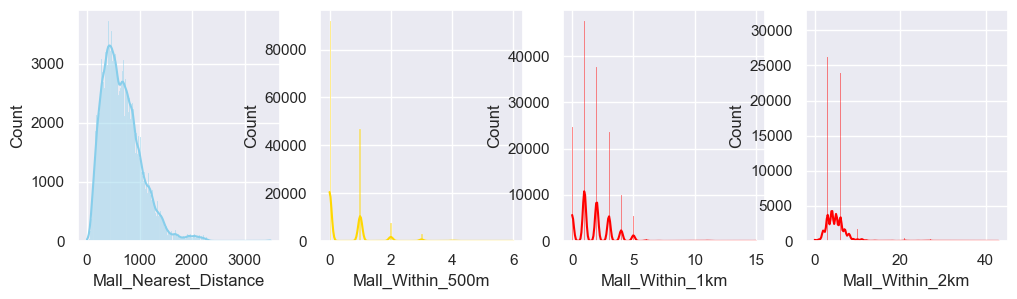

In [143]:

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Mall_Within_500m", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="Mall_Within_1km", kde=True, color="red", ax=axs[2])
sns.histplot(data=df, x="Mall_Within_2km", kde=True, color="red", ax=axs[3])

plt.show()

In [144]:
#Since 'Mall_Within_500m' and  'Mall_Within_1km' are both highly correlated with 'Mall_Within_2km', and the last one is best correlated with the dependent variable, we will drop the first 2 and just use Mall within 2km

In [145]:
housing.drop(columns = ['Mall_Within_500m', 'Mall_Within_1km'], inplace = True)

In [146]:
# Checking for correlation between hawker distance features

housing.loc[:,['Hawker_Nearest_Distance', 'Hawker_Within_500m','Hawker_Within_1km', 'Hawker_Within_2km', 'resale_price']].corr()

,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,resale_price
Hawker_Nearest_Distance,1.000000,-0.529531,-0.605385,-0.595827,-0.016078
Hawker_Within_500m,-0.529531,1.000000,0.756713,0.639865,0.013037
Hawker_Within_1km,-0.605385,0.756713,1.000000,0.830123,0.090727
Hawker_Within_2km,-0.595827,0.639865,0.830123,1.000000,0.182935
resale_price,-0.016078,0.013037,0.090727,0.182935,1.000000


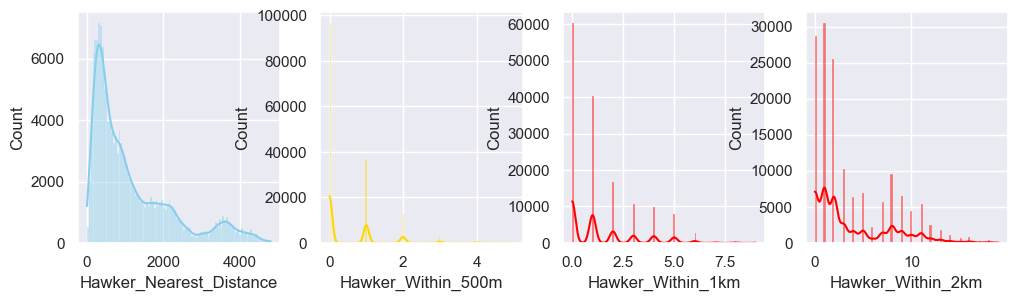

In [147]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Hawker_Within_500m", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="Hawker_Within_1km", kde=True, color="red", ax=axs[2])
sns.histplot(data=df, x="Hawker_Within_2km", kde=True, color="red", ax=axs[3])

plt.show()

In [148]:
#Will do the same for hawkers 

housing.drop(columns = ['Hawker_Within_500m', 'Hawker_Within_1km'], inplace = True)

In [149]:
# Looking at variables relating to unit size and profile

housing[['storey_range','floor_area_sqm', 'lease_commence_date', 'mid_storey', 'lower', 'upper', 'mid','floor_area_sqft', 
'price_per_sqft','hdb_age','max_floor_lvl', 'year_completed', 'commercial', 'market_hawker','multistorey_carpark', 
'precinct_pavilion', 'Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month']].head()

,storey_range,floor_area_sqm,lease_commence_date,mid_storey,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,Tranc_YearMonth,Tranc_Year,Tranc_Month
0,10 TO 12,90.0,2006,11,10,12,11,968.760,701.928238,15,25,2005,N,N,N,N,2016-05,2016,5
1,07 TO 09,130.0,1987,8,7,9,8,1399.320,475.230826,34,9,1987,N,N,N,N,2012-07,2012,7
2,13 TO 15,144.0,1997,14,13,15,14,1550.016,540.639580,24,16,1996,N,N,N,N,2013-07,2013,7
3,01 TO 05,103.0,1992,3,1,5,3,1108.692,496.080066,29,11,1990,Y,N,N,N,2012-04,2012,4
4,01 TO 03,83.0,1987,2,1,3,2,893.412,333.552717,34,4,1987,N,N,N,N,2017-12,2017,12


In [150]:
# replace all storey-related variables with mid-storey as the estimated median height  and keeping max floor level

housing['est_floor_level'] = housing['mid_storey'] 
housing.drop(columns = ['storey_range', 'lower','upper', 'mid','mid_storey'], inplace = True)

In [151]:
# to use floor_area_sqft instead of floor_area_sqm for size

housing.drop(columns = 'floor_area_sqm', inplace = True)

In [152]:
# to calculate a new variable to estimate age of unit at the point of transaction instead of using current time variables
# dropping the other variables 

housing['age_at_sale'] = housing['Tranc_Year'] - housing['lease_commence_date']
housing.drop(columns = ['hdb_age','year_completed','Tranc_YearMonth','lease_commence_date'], inplace = True)

In [153]:
# Converting the following variables to categorical 
# To see if transactions in a specific year or month impacts the resale price 

housing['Tranc_Year'] = housing['Tranc_Year'].astype('category')
housing['Tranc_Month'] = housing['Tranc_Month'].astype('category')

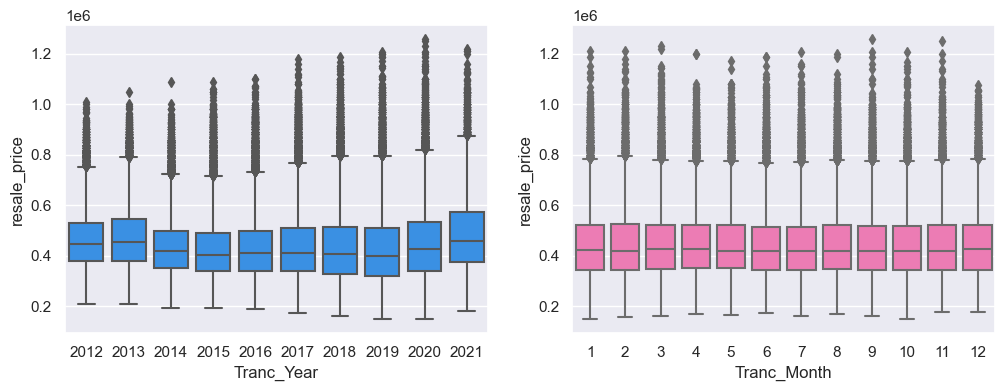

In [162]:
# Looking at the year and month distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df = housing

sns.boxplot(data=df, x="Tranc_Year", y = "resale_price", color="dodgerblue", ax=axs[0])
sns.boxplot(data=df, x="Tranc_Month", y = "resale_price", color="hotpink", ax=axs[1])

plt.show()

There does not seem to be much difference between sales completed in different months.
However, in recent years there is a wider spread of resale prices, with an increase in higher-priced homes being sold (even after outliers have been removed).

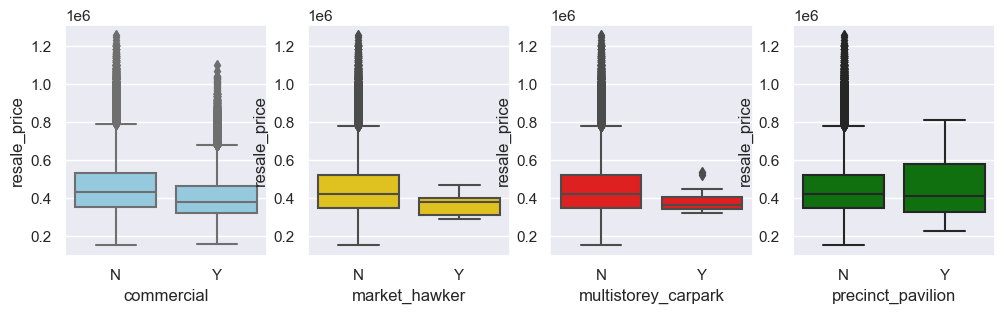

In [55]:
# Looking at amenity-related variables

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
df = housing
 
sns.boxplot(data=df, x="commercial", y = "resale_price", color="skyblue", ax=axs[0])
sns.boxplot(data=df, x="market_hawker", y = "resale_price", color="gold", ax=axs[1])
sns.boxplot(data=df, x="multistorey_carpark", y = "resale_price", color="red", ax=axs[2])
sns.boxplot(data=df, x="precinct_pavilion", y = "resale_price", color="green", ax=axs[3])

plt.show()

In [56]:
housing.commercial.value_counts(normalize = True)

N    0.80807
Y    0.19193
Name: commercial, dtype: float64

In [57]:
housing.market_hawker.value_counts(normalize = True)

N    0.9999
Y    0.0001
Name: market_hawker, dtype: float64

In [58]:
housing.multistorey_carpark.value_counts(normalize = True)

N    0.99972
Y    0.00028
Name: multistorey_carpark, dtype: float64

In [59]:
housing.precinct_pavilion.value_counts(normalize = True)

N    0.999246
Y    0.000754
Name: precinct_pavilion, dtype: float64

In [60]:
# Keeping only commercial and dropping the rest due to sparsity of data. 

housing.drop(columns = ['market_hawker','multistorey_carpark', 'precinct_pavilion'], inplace = True)

In [61]:
# dropping all postal, latitude and longitude variables - unsure of how to interpret them within a regression model

housing.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude','pri_sch_longitude',
                        'sec_sch_longitude','sec_sch_latitude','postal'], inplace = True)

In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149805 entries, 0 to 150633
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   id                         149805 non-null  int64   
 1   block                      149805 non-null  object  
 2   resale_price               149805 non-null  float64 
 3   Tranc_Year                 149805 non-null  category
 4   Tranc_Month                149805 non-null  category
 5   full_flat_type             149805 non-null  object  
 6   floor_area_sqft            149805 non-null  float64 
 7   price_per_sqft             149805 non-null  float64 
 8   max_floor_lvl              149805 non-null  int64   
 9   commercial                 149805 non-null  object  
 10  total_dwelling_units       149805 non-null  int64   
 11  planning_area              149805 non-null  object  
 12  Mall_Nearest_Distance      149805 non-null  float64 
 13  Mall_Within_2k

### Examining Distributions

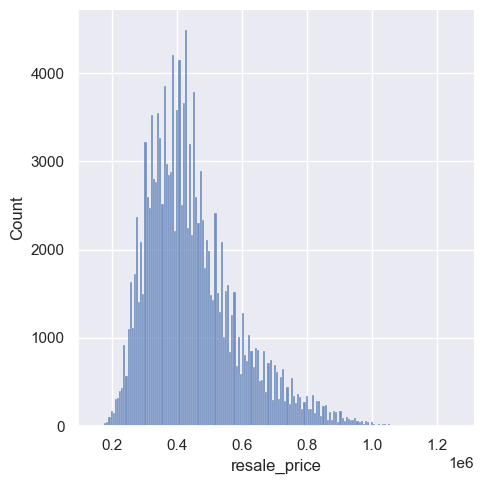

In [63]:
# examining the DV
sns.displot(housing['resale_price'])

<AxesSubplot: >

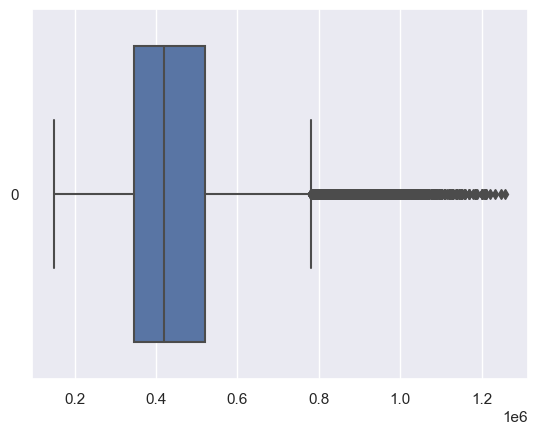

In [64]:
sns.boxplot(housing['resale_price'], orient = 'h')

In [65]:
# Removing the outliers in the dependent variable

Q1 = np.percentile(housing['resale_price'] , 25)
Q3 = np.percentile(housing['resale_price'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
outliers = housing['resale_price'][(housing['resale_price'] > ul)]
outliers.index
housing.drop(outliers.index, inplace = True)

In [66]:
# Log dependent variable to normalise the distribution

housing["resale_price_log"] = np.log(housing["resale_price"])

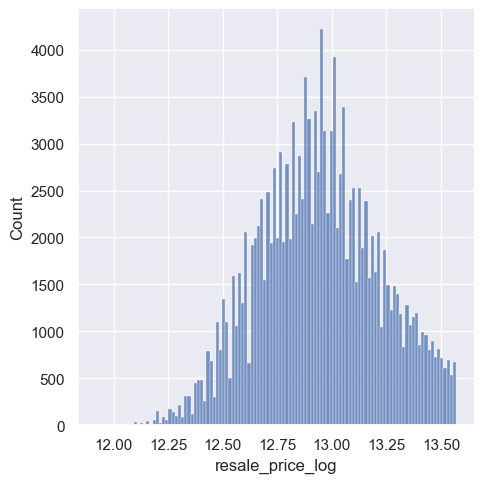

In [67]:
# examining the DV again
sns.displot(housing['resale_price_log'])

### Histograms

In [68]:
# Histograms for numerical variables

In [69]:
housing_num = housing.select_dtypes(exclude=['object', 'datetime'])
housing_num.describe(include = 'all')

,id,resale_price,Tranc_Year,Tranc_Month,floor_area_sqft,price_per_sqft,max_floor_lvl,total_dwelling_units,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,sec_sch_nearest_dist,cutoff_point,est_floor_level,age_at_sale,resale_price_log
count,144889.000000,144889.000000,144889.0,144889.0,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000
unique,NaN,NaN,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2020.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17892.0,13884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91879.362788,434416.744675,NaN,NaN,1037.790026,424.907439,14.701109,123.863178,664.741622,5.152862,1190.781644,3.622062,48.695643,57.372326,771.181927,114.982516,393.444184,55.387193,503.025279,209.973566,7.991946,24.369711,12.943404
std,53512.573654,121813.519616,NaN,NaN,259.515563,91.790834,5.411957,57.442313,369.907050,3.394611,1079.301602,3.877914,18.859472,55.598494,429.421036,55.354337,233.706649,17.873721,305.865397,19.832423,5.008552,11.766577,0.277055
min,1.000000,150000.000000,NaN,NaN,333.684000,205.108901,2.000000,2.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,21.971410,9.001285,45.668324,20.000000,38.913475,188.000000,2.000000,1.000000,11.918391
25%,44957.000000,345000.000000,NaN,NaN,796.536000,362.899480,12.000000,90.000000,391.517661,3.000000,380.552627,1.000000,40.000000,0.000000,464.114445,74.957847,226.285769,44.000000,287.819774,188.000000,5.000000,15.000000,12.751300
50%,92062.000000,418000.000000,NaN,NaN,1011.816000,408.382881,13.000000,112.000000,604.626276,5.000000,802.746567,2.000000,43.000000,48.000000,691.154969,107.571975,347.124050,54.000000,444.526671,208.000000,8.000000,25.000000,12.943237
75%,137866.000000,505000.000000,NaN,NaN,1194.804000,464.511334,16.000000,143.000000,868.818288,6.000000,1715.069791,6.000000,60.000000,99.000000,983.514000,146.332469,500.446690,67.000000,637.292869,224.000000,11.000000,33.000000,13.132314


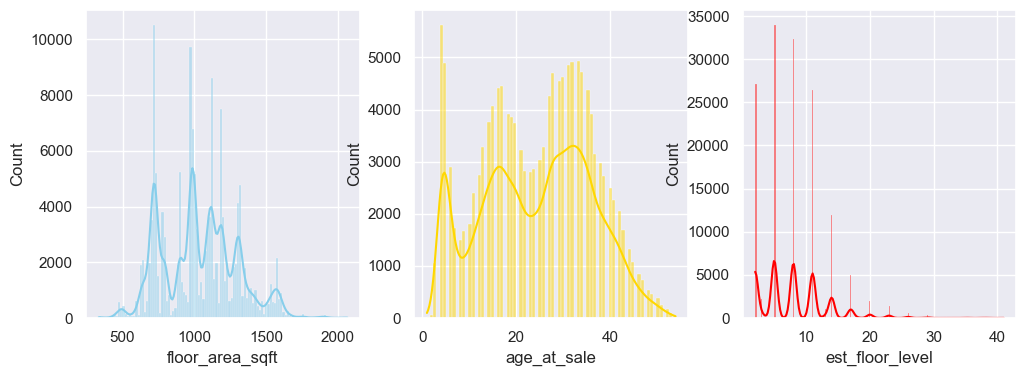

In [70]:
# Histogram set 1 for housing size and age

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
df = housing_num
 
sns.histplot(data=df, x="floor_area_sqft", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="age_at_sale", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="est_floor_level", kde=True, color="red", ax=axs[2])

plt.show()

In [71]:
# # Histogram set 2 for type sold

# sns.set(style="darkgrid")
# fig, axs = plt.subplots(2, 4, figsize=(17, 8))
# df = housing 
 
# sns.histplot(data=df, x="1room_sold", kde=True, color="tan", ax=axs[0, 0])
# sns.histplot(data=df, x="2room_sold", kde=True, color="fuchsia", ax=axs[0, 1])
# sns.histplot(data=df, x="3room_sold", kde=True, color="dodgerblue", ax=axs[0,2])
# sns.histplot(data=df, x="4room_sold", kde=True, color="teal", ax=axs[0,3])
# sns.histplot(data=df, x="5room_sold", kde=True, color="mediumslateblue", ax=axs[1,0])
# sns.histplot(data=df, x="exec_sold", kde=True, color="violet", ax=axs[1,1])
# sns.histplot(data=df, x="multigen_sold", kde=True, color="orange", ax=axs[1,2])
# sns.histplot(data=df, x="studio_apartment_sold", kde=True, color="blueviolet", ax=axs[1,3])

# plt.show()

In [72]:
# # Histogram set 3 for rented rooms

# sns.set(style="darkgrid")
# fig, axs = plt.subplots(1, 4, figsize=(17, 4))
# df = housing 
 
# sns.histplot(data=df, x="1room_rental", kde=True, color="tan", ax=axs[0])
# sns.histplot(data=df, x="2room_rental", kde=True, color="fuchsia", ax=axs[1])
# sns.histplot(data=df, x="3room_rental", kde=True, color="dodgerblue", ax=axs[2])
# sns.histplot(data=df, x="other_room_rental", kde=True, color="teal", ax=axs[3])

# plt.show()


In [73]:
# Data for rooms sold and rented are very skewed

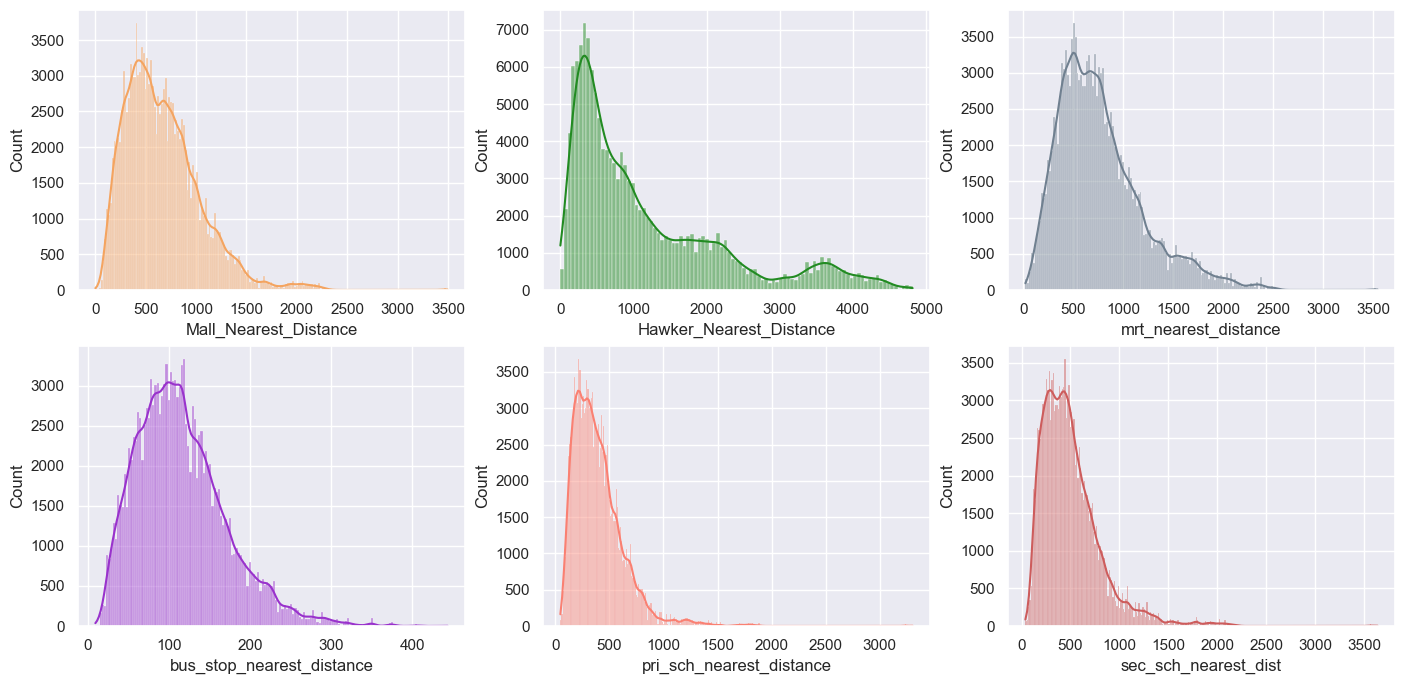

In [74]:
# Histogram set 3 for distances without log

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(17, 8))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="sandybrown", ax=axs[0, 0])
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="forestgreen", ax=axs[0, 1])
sns.histplot(data=df, x="mrt_nearest_distance", kde=True, color="slategrey", ax=axs[0,2])
sns.histplot(data=df, x="bus_stop_nearest_distance", kde=True, color="darkorchid", ax=axs[1,0])
sns.histplot(data=df, x="pri_sch_nearest_distance", kde=True, color="salmon", ax=axs[1,1])
sns.histplot(data=df, x="sec_sch_nearest_dist", kde=True, color="indianred", ax=axs[1,2])


plt.show()


In [75]:
# to log all variables with large scales, but first replace 0 with 1 for "Mall_Nearest_Distance"

housing["Mall_Nearest_Distance"].replace({0:1}, inplace = True)

In [76]:
housing["floor_area_sqft_log"] = np.log(housing["floor_area_sqft"])
housing["Mall_Nearest_Distance_log"] = np.log(housing["Mall_Nearest_Distance"])
housing["Hawker_Nearest_Distance_log"] = np.log(housing["Hawker_Nearest_Distance"])
housing["mrt_nearest_distance_log"] = np.log(housing["mrt_nearest_distance"])
housing["bus_stop_nearest_distance_log"] = np.log(housing["bus_stop_nearest_distance"])
housing["pri_sch_nearest_distance_log"] = np.log(housing["pri_sch_nearest_distance"])
housing["sec_sch_nearest_dist_log"] = np.log(housing["sec_sch_nearest_dist"])


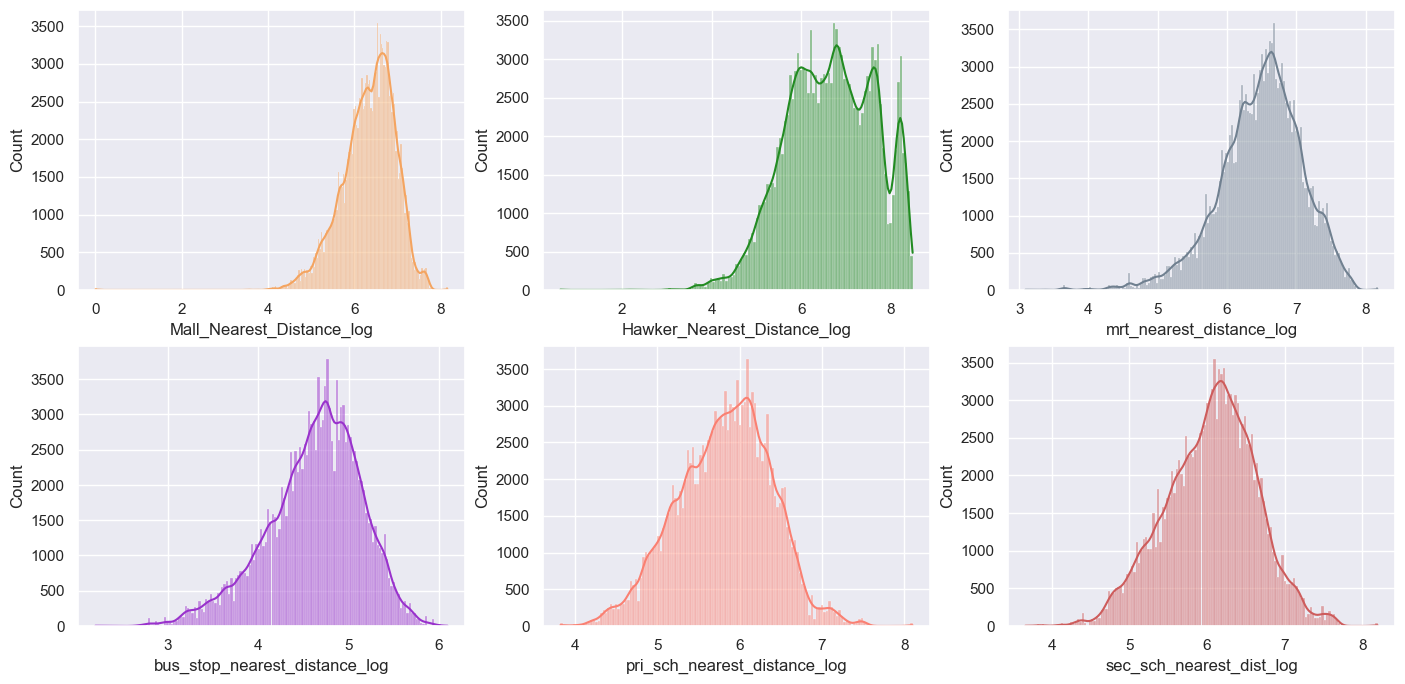

In [77]:
# # Histogram set 3 for distances

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(17, 8))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance_log", kde=True, color="sandybrown", ax=axs[0, 0])
sns.histplot(data=df, x="Hawker_Nearest_Distance_log", kde=True, color="forestgreen", ax=axs[0, 1])
sns.histplot(data=df, x="mrt_nearest_distance_log", kde=True, color="slategrey", ax=axs[0,2])
sns.histplot(data=df, x="bus_stop_nearest_distance_log", kde=True, color="darkorchid", ax=axs[1,0])
sns.histplot(data=df, x="pri_sch_nearest_distance_log", kde=True, color="salmon", ax=axs[1,1])
sns.histplot(data=df, x="sec_sch_nearest_dist_log", kde=True, color="indianred", ax=axs[1,2])


plt.show()


In [78]:
# # # Drop original variables above

housing.drop(columns = ["floor_area_sqft", "Mall_Nearest_Distance",
                       "Hawker_Nearest_Distance", "mrt_nearest_distance", 
                       "bus_stop_nearest_distance", "pri_sch_nearest_distance",
                       "sec_sch_nearest_dist"], inplace = True)

### Correlation

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_35067/1985615254.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Variables')

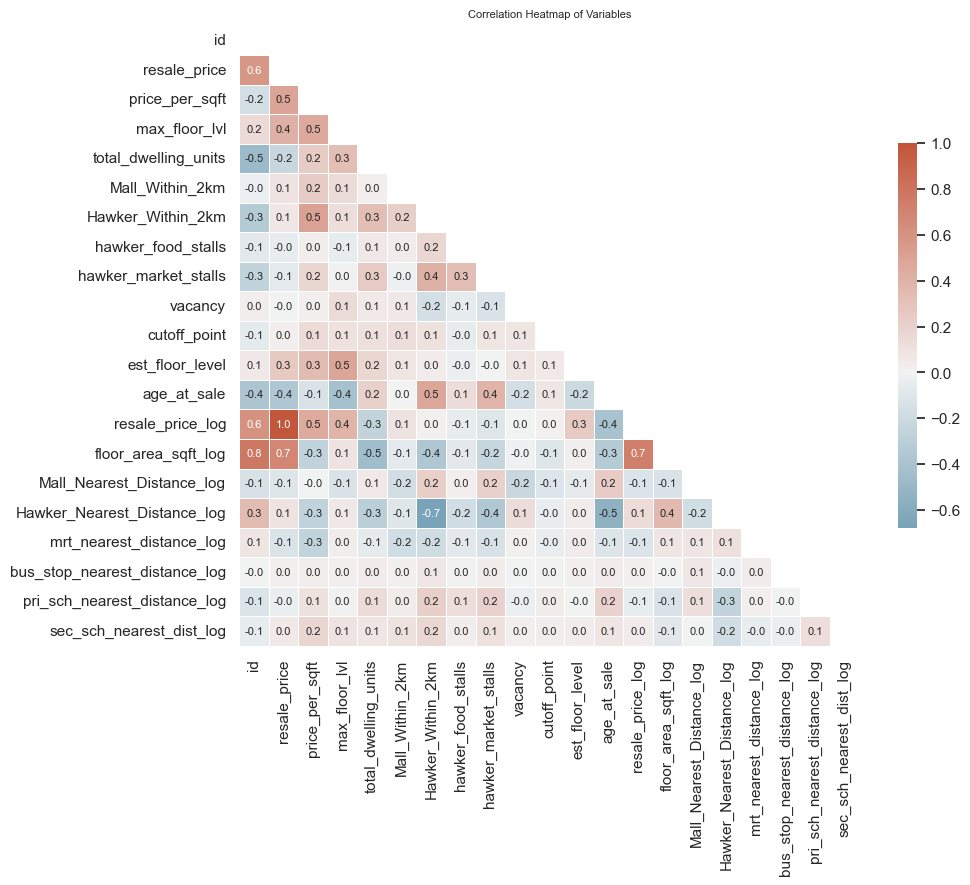

In [79]:
# 1.Correlation of all numerical variables to observe the relationships between them 

sns.set_theme(style="white")
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

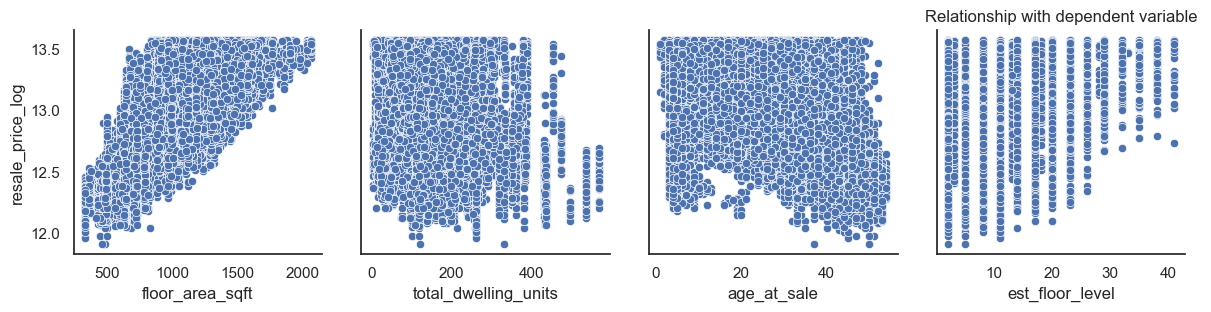

In [80]:
# Relationship between resale price log and other variables
g = sns.PairGrid(housing_num, y_vars='resale_price_log',x_vars= ['floor_area_sqft', 'total_dwelling_units','age_at_sale', 'est_floor_level'], 
                 height=3, aspect=1)
g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


In [81]:
# # Relationship between resale price log and other variables
# g = sns.PairGrid(housing_num, y_vars='resale_price_log',x_vars= ['1room_sold', '2room_sold', '3room_sold',
#        '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold'], 
#                  height=3, aspect=1)
# g.map(sns.scatterplot)

# plt.title('Relationship with dependent variable', fontsize=12)
# g.add_legend()


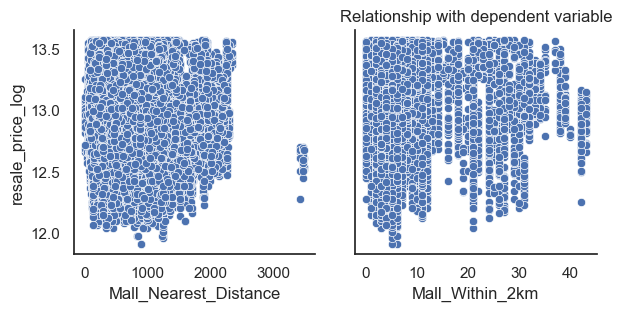

In [82]:
# Relationship between resale price log and other variables
g = sns.PairGrid(housing_num, y_vars='resale_price_log',x_vars= ['Mall_Nearest_Distance',
       'Mall_Within_2km'], 
                 height=3, aspect=1)
g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


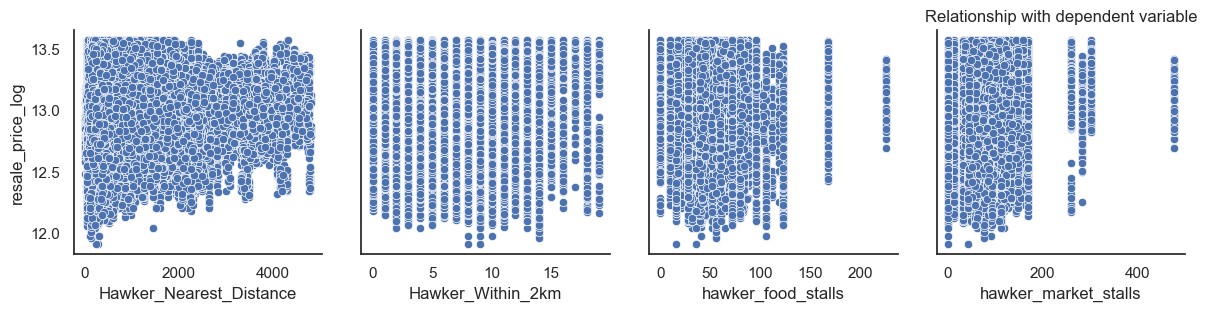

In [83]:
# Relationship between resale price log and other variables
g = sns.PairGrid(housing_num, y_vars='resale_price_log',x_vars= ['Hawker_Nearest_Distance', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls'], height=3, aspect=1)
g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


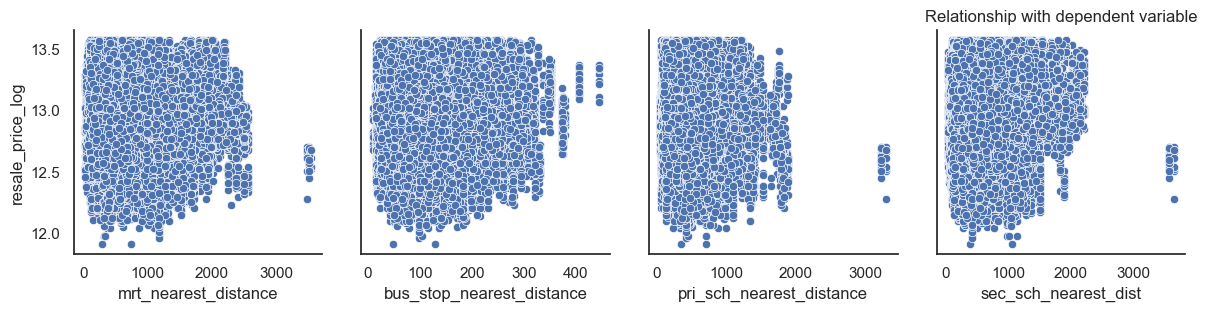

In [84]:
# Relationship between resale price log and other variables
g = sns.PairGrid(housing_num, y_vars='resale_price_log',x_vars= ['mrt_nearest_distance', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'sec_sch_nearest_dist'], 
                 height=3, aspect=1)
g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


### Looking at skew and multicollinearity

In [85]:
# Checking for skewness of variables

housing.skew().sort_values(ascending=False).round(2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_35067/3820577826.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.skew().sort_values(ascending=False).round(2)


Mall_Within_2km                  4.88
total_dwelling_units             2.17
max_floor_lvl                    1.72
hawker_food_stalls               1.65
price_per_sqft                   1.41
Hawker_Within_2km                1.20
est_floor_level                  1.18
hawker_market_stalls             0.73
resale_price                     0.65
cutoff_point                     0.45
vacancy                          0.20
resale_price_log                 0.02
id                               0.01
age_at_sale                     -0.05
pri_sch_nearest_distance_log    -0.17
sec_sch_nearest_dist_log        -0.19
Hawker_Nearest_Distance_log     -0.24
floor_area_sqft_log             -0.35
bus_stop_nearest_distance_log   -0.54
mrt_nearest_distance_log        -0.61
Mall_Nearest_Distance_log       -0.75
dtype: float64

In [86]:
# Selecting numerical variables

housing_num = housing.select_dtypes(exclude=['object', 'datetime'])
housing_num.columns

Index(['id', 'resale_price', 'Tranc_Year', 'Tranc_Month', 'price_per_sqft',
       'max_floor_lvl', 'total_dwelling_units', 'Mall_Within_2km',
       'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'vacancy', 'cutoff_point', 'est_floor_level', 'age_at_sale',
       'resale_price_log', 'floor_area_sqft_log', 'Mall_Nearest_Distance_log',
       'Hawker_Nearest_Distance_log', 'mrt_nearest_distance_log',
       'bus_stop_nearest_distance_log', 'pri_sch_nearest_distance_log',
       'sec_sch_nearest_dist_log'],
      dtype='object')

In [87]:
# Checking for multicollinearity

X = housing[['price_per_sqft', 'max_floor_lvl',
       'total_dwelling_units', 'Mall_Within_2km', 'Hawker_Within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'vacancy', 'cutoff_point',
       'est_floor_level', 'age_at_sale', 
       'floor_area_sqft_log', 'Mall_Nearest_Distance_log',
       'Hawker_Nearest_Distance_log', 'mrt_nearest_distance_log',
       'bus_stop_nearest_distance_log', 'pri_sch_nearest_distance_log',
       'sec_sch_nearest_dist_log']]
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature         VIF
0                  price_per_sqft   47.776991
1                   max_floor_lvl   19.001909
2            total_dwelling_units    8.499630
3                 Mall_Within_2km    3.844300
4               Hawker_Within_2km    5.844828
5              hawker_food_stalls    8.757584
6            hawker_market_stalls    3.084748
7                         vacancy   11.619722
8                    cutoff_point  116.144110
9                 est_floor_level    4.861088
10                    age_at_sale   13.752278
11            floor_area_sqft_log  440.030078
12      Mall_Nearest_Distance_log  123.559765
13    Hawker_Nearest_Distance_log   97.903282
14       mrt_nearest_distance_log  129.064136
15  bus_stop_nearest_distance_log   79.497125
16   pri_sch_nearest_distance_log  113.368753
17       sec_sch_nearest_dist_log  109.661954


In [88]:
# Dropping the variables involved in improving VIF

housing.drop(columns = ['id','floor_area_sqft_log','cutoff_point','price_per_sqft','max_floor_lvl']
             ,inplace = True)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_35067/645969612.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Variables')

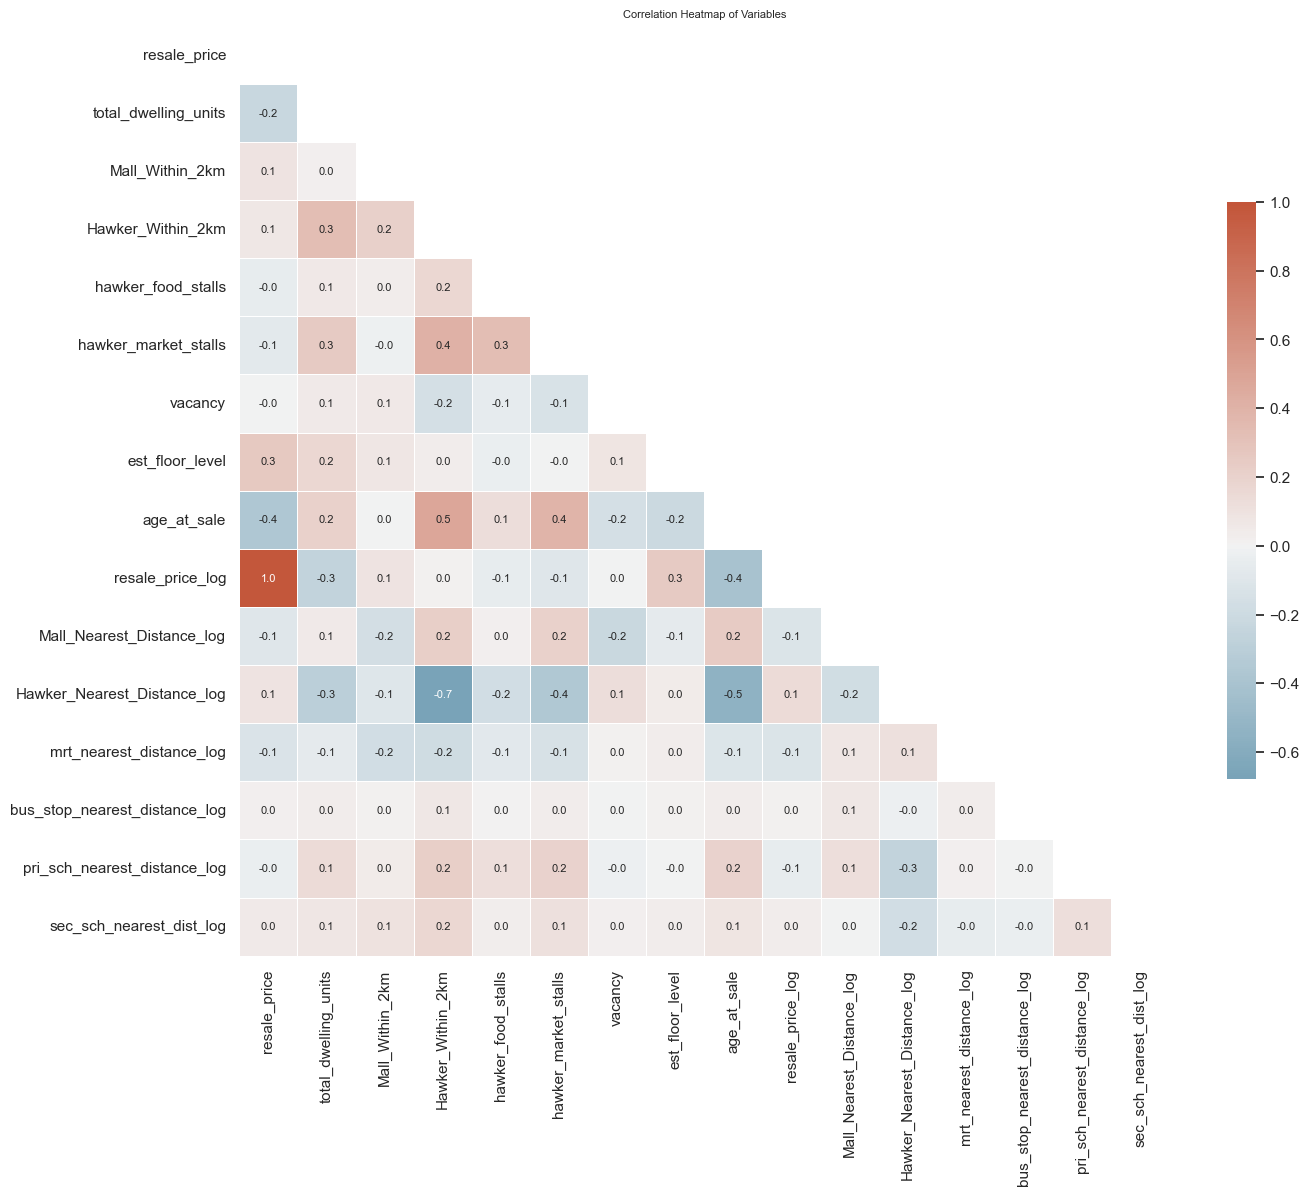

In [89]:
# Looking at the correlation again

sns.set_theme(style="white")
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

In [90]:
housing.describe(include = 'all')

,block,resale_price,Tranc_Year,Tranc_Month,full_flat_type,commercial,total_dwelling_units,planning_area,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_name,pri_sch_name,vacancy,sec_sch_name,bus_mrt_interchange,est_floor_level,age_at_sale,resale_price_log,Mall_Nearest_Distance_log,Hawker_Nearest_Distance_log,mrt_nearest_distance_log,bus_stop_nearest_distance_log,pri_sch_nearest_distance_log,sec_sch_nearest_dist_log
count,144889,144889.000000,144889.0,144889.0,144889,144889,144889.000000,144889,144889.000000,144889.000000,144889.000000,144889.000000,144889,144889,144889.000000,144889,144889,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000,144889.000000
unique,2430,NaN,10.0,12.0,40,2,NaN,32,NaN,NaN,NaN,NaN,93,177,NaN,134,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2,NaN,2020.0,3.0,4 ROOM Model A,N,NaN,Jurong West,NaN,NaN,NaN,NaN,Punggol,Marsiling Primary School,NaN,Bendemeer Secondary School,no interchange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,547,NaN,17892.0,13884.0,34355,116554,NaN,11444,NaN,NaN,NaN,NaN,7485,2069,NaN,3116,60812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,434416.744675,NaN,NaN,NaN,NaN,123.863178,NaN,5.152862,3.622062,48.695643,57.372326,NaN,NaN,55.387193,NaN,NaN,7.991946,24.369711,12.943404,6.334793,6.656730,6.487765,4.621335,5.816198,6.054096
std,NaN,121813.519616,NaN,NaN,NaN,NaN,57.442313,NaN,3.394611,3.877914,18.859472,55.598494,NaN,NaN,17.873721,NaN,NaN,5.008552,11.766577,0.277055,0.609277,0.976551,0.595962,0.519974,0.572665,0.587399
min,NaN,150000.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,20.000000,NaN,NaN,2.000000,1.000000,11.918391,0.000000,0.627699,3.089742,2.197367,3.821405,3.661341
25%,NaN,345000.000000,NaN,NaN,NaN,NaN,90.000000,NaN,3.000000,1.000000,40.000000,0.000000,NaN,NaN,44.000000,NaN,NaN,5.000000,15.000000,12.751300,5.970031,5.941624,6.140131,4.316926,5.421799,5.662334
50%,NaN,418000.000000,NaN,NaN,NaN,NaN,112.000000,NaN,5.000000,2.000000,43.000000,48.000000,NaN,NaN,54.000000,NaN,NaN,8.000000,25.000000,12.943237,6.404611,6.688039,6.538364,4.678160,5.849682,6.097010
75%,NaN,505000.000000,NaN,NaN,NaN,NaN,143.000000,NaN,6.000000,6.000000,60.000000,99.000000,NaN,NaN,67.000000,NaN,NaN,11.000000,33.000000,13.132314,6.767134,7.447209,6.891132,4.985881,6.215501,6.457229


In [91]:
housing.shape

(144889, 26)

In [92]:
housing.drop(columns = ['block','pri_sch_name', 'sec_sch_name'], inplace = True)

### Exporting data

In [93]:
# Save as csv file 
housing.to_csv('./housing.csv')  